# Real-Time Sign Language Hand Detection

## 1. Business Understanding

### (a) Introduction

In a world where effective communication is the cornerstone of social interaction,there exist significant challenges for individuals with disabilities,particularly those who rely on sign language as their primary means of communication. Communication is not just a basic human right but also a fundamental requirement for participation in society,accessing essential services,and enjoying a high quality of life.

Finger Spelling is a crucial form of communication for individuals with hearing impairments.It involves using handshapes to spell out words and convey messages,making it an essential component of sign language and augmenting other communication methods.For many Deaf and Hard of Hearing individuals,fingerspelling is not just a mode of communication;it is a vital tool for expressing thoughts,emotions and ideas effectively.Despite its significance, there exist a stark communication gap between individuals who rely on fingerspelling and the boarder society.This gap often leads to social isolation,limited access to education and employment opportunities, and barriers to accessing essential services. Bridging this divide is not just a matter of convinience, its a matter of fundamental human rights and social justice.

Recognizing this, the Ministry of Public Services,Gender,Senior Citizens Affairs, and the special Program and Rehabilitative Services Division has embarked on a transformative initiative to break down the barriers faced by individuals with this kind of disability.This division focuses on providing support and services to individuals with special needs. It often encompasses services for people with disabilities, including rehabilitation,vocational training and programs aimed at improving their quality of life.

Our project will harness the power of advanced computer vision techniques to detect and interpret the intricate handshapes and movements that constitute fingerspelling.By doing so in real time, we aim to create a system that can facilitate immediate, meaningful communication between individuals with disabilities and their conterparts.Our vision is to develop an innovative solution that leverages modern technology to empower Deaf and Hard of Hearing individuals by enabling real-time fingerspelling interpretation. This project will improve the ministry's ability to provide services to individuals with disabilities,especially those who rely on fingerspelling.This will enable more effective communication between the government officials and citizens with disabilities,enhancing the quality and accessibility of services.


### (b) The Problem Statement

Effective communication is a fundamental human right and an essential component of social inclusion and participation. However individuals with hearing impairments who rely on fingerspelling as their primary means of communication face often significant communication barriers.The problem at hand is limited accessibility and inclusivity faced by individuals with hearing impairments who rely on fingerspelling.Current communication solutions do not adequately facilitate effective communication between individuals proficient in this visual-gesture language. The Ministry of Public Services,Gender, Senior Citizens Affairs and Special Program and Rehabilitative Services Division have commissioned this project to develop and implement a real-time fingerspelling detection system that can bridge the communication gap between individuals with hearing impairments to communicate effectively with the government officials,access government services, education, and employment opportunities and promote their overall social inclusion and well-being.

### (c) Defining a Metric of Success

- **Recognition Accuracy**

Achieve a recognition accuracy rate of at least 90%, measured by the percentage of correctly identified fingerspelled words out of the total fingerspelled words processed by the system.

- **Response Time**

Ensure a response time of less than 20 seconds for recognizing and translating fingerspelling gestures into text or speech in real-time.

- **Error Rate**

Maintain a low error rate, with recognition errors accounting for less than 5% of total interactions with the system.

- **Intergration success**

Intergrate the system successully into a website,ensuring seamless functionality.

### (d) The Main Objective

To develop and implement a real-time fingerspelling detection system that empowers individuals with hearing impairments to communicate effectively with the broader community,government officials and service providers,thereby promoting inclusivity,accessibility and social intergration.

### (e) Specific Objectives

- **Data Collection**

Collect a diverse and comprehensive dataset of fingerspelling gestures performed by individuals with varying signing styles,hand shapes and speeds

- **Develop a robust hand detection system**

Create an accurate and robust hand detection system using cvzone and MediaPipe to ensure precise tracking of hand movements during fingerspelling.

- **Implement fingerspelling recognition**

Develop a recogntion component that can identify and interpret fingerspelled words and gestures in real-time using machine learning algorithms.

- **Real-time translation**

Intergrate a translation mechanism that converts detected fingerspelled letters into text in real-time,ensuring immediate and accessible communication.

- **User-Friendly Interface**

Design an intuitive user interface that is accessible and user-friendly, allowing individuals with disabilities to interact with the system comfortably

- **Intergration into a website**

Develop a website to intergrate the system to maximize its reach and impact.

### (f) Data Understanding

The data being collected for this project, which comprises a diverse set of fingerspelling gestures performed by two females and two males, holds paramount relevance to the overall success and effectiveness of our fingerspelling recognition system. This dataset encapsulates the rich variability inherent in real-world signing practices, encompassing distinct signing styles, handshapes, and gender-specific variations. By including equal representation from both genders, we acknowledge potential differences in signing articulation, which ensures that our system can proficiently recognize and accommodate diverse signing patterns. Additionally, capturing variations in lighting conditions and backgrounds reflects the environmental diversity that users may encounter, further enhancing the system's robustness and adaptability. In essence, this meticulously collected and annotated dataset serves as the bedrock upon which our project's success is built, facilitating the development of a highly accurate, inclusive, and adaptable real-time fingerspelling recognition system that effectively bridges communication barriers for individuals with hearing impairments.


## 2. Importing Libraries

In [1]:
import cv2
from cvzone.HandTrackingModule import HandDetector
import numpy as np
import math
import time
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten, Dense


## 3. Collecting the Data

#### (i) Images

In [ ]:
cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)

offset = 20
imgSize = 300

folder = 'Data/A'
counter = 0

while True:
    success, img = cap.read()
    hands, img = detector.findHands(img)
    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        imgwhite = np.ones((imgSize, imgSize, 3), np.uint8)*255

        imgCrop =img[y-offset:y + h+offset, x-offset:x + w+offset]

        imgCropShape = imgCrop.shape

        

        aspectRatio = h/w
        if aspectRatio > 1:
            k = imgSize/h
            wCal = math.ceil(k*w)
            imgResize = cv2.resize(imgCrop, (wCal, imgSize))
            imgResizeShape = imgResize.shape
            wGap = math.ceil(imgSize-wCal)/2
            imgwhite[:, int(wGap) : int(wCal) + int(wGap)] = imgResize

        else:
            k = imgSize/w
            hCal = math.ceil(k*h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))

            imgResizeShape = imgResize.shape
            hGap = math.ceil((imgSize-hCal)/2)
            imgwhite[int(hGap) : int(hCal) + int(hGap), :] = imgResize


        cv2.imshow('ImageCrop', imgCrop)
        cv2.imshow('ImageWhite', imgwhite)

    cv2.imshow('Image', img)
    key = cv2.waitKey(10)
    if key == ord('s'):
        counter += 1
        cv2.imwrite(f'{folder}/Image_{time.time()}.jpg', imgwhite)
        print(counter)


#### (ii) Videos

In [ ]:
# Creating a folder to save the captured videos if it doesn't exist
output_folder = 'Data/Z/'
os.makedirs(output_folder, exist_ok=True)

# Opening a connection to the webcam (0 for default webcam)
cap = cv2.VideoCapture(0)

# Defining the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # You can change the codec as needed
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Countering to keep track of video file names
video_counter = 10

while True:
    # Generating a new filename for each video
    video_filename = os.path.join(output_folder, f'output_{video_counter}.avi')
    out = cv2.VideoWriter(video_filename, fourcc, 20.0, (frame_width, frame_height))  # Adjust resolution as needed

    # Incrementing the video counter
    video_counter += 1

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Writing the frame to the output video file
        out.write(frame)

        # Displaying the frame
        cv2.imshow('Video', frame)

        key = cv2.waitKey(1)
        if key == ord('q'):  # Press 'q' to stop recording and start a new video
            break

    # Releasing the VideoWriter object for the current video
    out.release()

    key = cv2.waitKey(1)
    if key == ord('q'):  # Press 'q' to stop recording and start a new video
        break

# Releasing the VideoCapture object
cap.release()

# Closing all windows
cv2.destroyAllWindows()


## 4. Reading the Data
#### Data Distribution Analysis

In [2]:
# Defining the paths to your data directories
train_dir = 'Data/Train'
validation_dir = 'Data/Validation'
test_dir = 'Data/Test'

# Listing the files in each directory
train_files = os.listdir(train_dir)
validation_files = os.listdir(validation_dir)
test_files = os.listdir(test_dir)

# Displaying the number of files in each directory
print(f"Train set contains {len(train_files)} files.")
print(f"Validation set contains {len(validation_files)} files.")
print(f"Test set contains {len(test_files)} files.")

Train set contains 2 files.
Validation set contains 2 files.
Test set contains 2 files.


In [3]:
# Defining the path to your data directory
data_dir = 'Data'

# Function to count files in a directory with specified extensions
def count_files(directory, extensions):
    file_count = 0
    for extension in extensions:
        file_count += len([filename for filename in os.listdir(directory) if filename.lower().endswith(extension)])
    return file_count

# Defining extensions for images and videos
image_extensions = ['.jpg', '.png', '.jpeg']
video_extensions = ['.mp4', '.avi']

# Counting images in each letter directory (A to Z) for both train, validation, and test sets
image_counts = {}
video_counts = {}

sets = ['Train', 'Validation', 'Test']

for set_name in sets:
    set_dir = os.path.join(data_dir, set_name)
    
    # Counting images for each letter in the 'images' directory
    image_counts[set_name] = {}
    for letter in 'ABCDEFGHIKLMNOPQRSTUVWXY':
        image_dir = os.path.join(set_dir, 'images', letter)
        image_counts[set_name][letter] = count_files(image_dir, image_extensions)

    # Counting videos in directories 'J' and 'Z' in the 'videos' directory, only if they exist
    video_dir_J = os.path.join(set_dir, 'videos', 'J')
    video_dir_Z = os.path.join(set_dir, 'videos', 'Z')

    video_counts[set_name] = {}
    video_counts[set_name]['J'] = count_files(video_dir_J, video_extensions) if os.path.exists(video_dir_J) else 0
    video_counts[set_name]['Z'] = count_files(video_dir_Z, video_extensions) if os.path.exists(video_dir_Z) else 0

# Printing the counts
for set_name in sets:
    print(f"Set: {set_name}")
    for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
        print(f"{letter}: Images: {image_counts[set_name].get(letter, 0)}")
    print(f"J: Videos: {video_counts[set_name]['J']}")
    print(f"Z: Videos: {video_counts[set_name]['Z']}")

Set: Train
A: Images: 120
B: Images: 120
C: Images: 120
D: Images: 120
E: Images: 120
F: Images: 120
G: Images: 120
H: Images: 120
I: Images: 879
J: Images: 0
K: Images: 138
L: Images: 109
M: Images: 219
N: Images: 160
O: Images: 144
P: Images: 135
Q: Images: 132
R: Images: 112
S: Images: 146
T: Images: 148
U: Images: 114
V: Images: 135
W: Images: 129
X: Images: 159
Y: Images: 101
Z: Images: 0
J: Videos: 10
Z: Videos: 9
Set: Validation
A: Images: 20
B: Images: 20
C: Images: 20
D: Images: 20
E: Images: 20
F: Images: 20
G: Images: 20
H: Images: 20
I: Images: 480
J: Images: 0
K: Images: 20
L: Images: 20
M: Images: 20
N: Images: 20
O: Images: 20
P: Images: 20
Q: Images: 20
R: Images: 20
S: Images: 20
T: Images: 20
U: Images: 20
V: Images: 20
W: Images: 20
X: Images: 20
Y: Images: 20
Z: Images: 0
J: Videos: 4
Z: Videos: 4
Set: Test
A: Images: 96
B: Images: 100
C: Images: 100
D: Images: 100
E: Images: 100
F: Images: 114
G: Images: 100
H: Images: 115
I: Images: 2649
J: Images: 0
K: Images: 10

#### Displaying Sample Images and Video Information

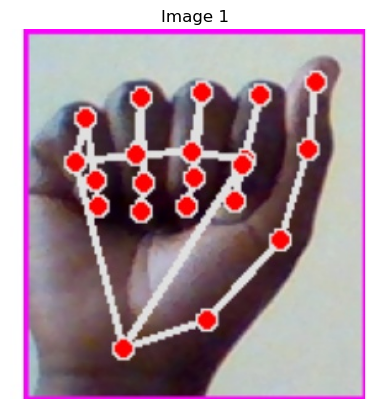

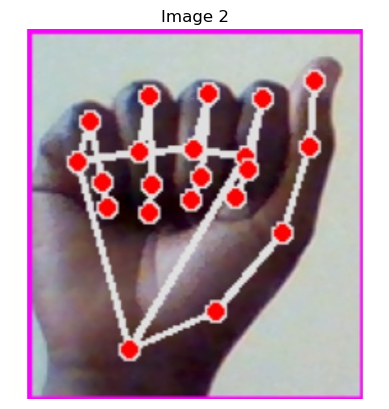

In [4]:
# Specifying the directory containing the 'A' images
letter_dir = os.path.join(train_dir,'images', 'A')

# Getting a list of all image files in the 'A' directory
image_files = [filename for filename in os.listdir(letter_dir) if filename.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Loading and displaying the first two images from the 'A' directory
for i in range(2):
    if i < len(image_files):
        image_filename = image_files[i]
        image_path = os.path.join(letter_dir, image_filename)

        # Loading and displaying the image
        image = cv2.imread(image_path)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f'Image {i+1}')
        plt.axis('off')
        plt.show()
    else:
        print(f'Not enough images in the "A" directory. Found {len(image_files)} images.')

In [5]:
# Specify the directory containing the 'J' videos
video_dir = os.path.join(train_dir, 'videos', 'J')

# Replace 'video_filename.mp4' with the actual filename of the video you want to load
sample_video_filename = 'output_3.avi'
sample_video_path = os.path.join(video_dir, sample_video_filename)

# Check if the video file exists
if os.path.isfile(sample_video_path):
    # Open the video file for reading
    cap = cv2.VideoCapture(sample_video_path)

    # Get video properties
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
    duration_sec = frame_count / frame_rate

    print(f"Video duration: {duration_sec} seconds")
    print(f"Frame rate: {frame_rate} fps")
    print(f"Number of frames: {frame_count}")

    # Release the video capture object
    cap.release()
else:
    print(f"Video file '{sample_video_filename}' not found in the 'J' directory.")

Video duration: 15.45 seconds
Frame rate: 20 fps
Number of frames: 309


#### Analyzing the Class Distribution

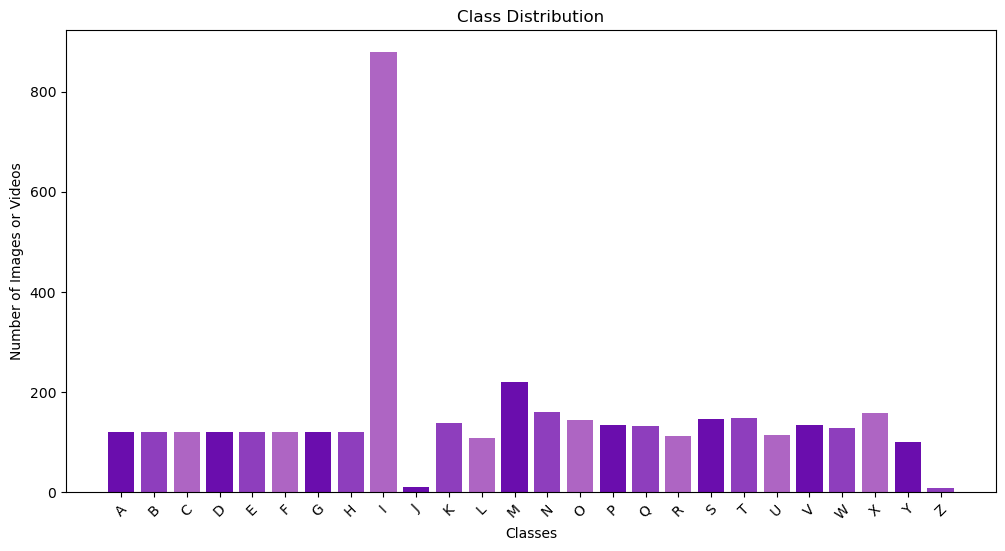

In [6]:
classes = [chr(65 + i) for i in range(26)]  # A to Z

# Define a color scheme for the bars
colors = ['#6a0dad', '#8e3ebd', '#ae65c3']

class_counts = {}

# Count the number of images or videos in each class
for class_name in classes:
    if class_name in ['J', 'Z']:
        class_dir = os.path.join(data_dir, 'Train', 'videos', class_name)  # Directory for 'J' and 'Z' videos
    else:
        class_dir = os.path.join(data_dir, 'Train', 'images', class_name)  # Directory for other classes

    num_files = len(os.listdir(class_dir))
    class_counts[class_name] = num_files

# Plot the class distribution with the custom color scheme
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color=colors)
plt.xlabel('Classes')
plt.ylabel('Number of Images or Videos')
plt.title('Class Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## 5. Data Wrangling


#### Data Augmentation

In [14]:
#defining common parameters

target_size = (300, 300)  # Define the target image size
batch_size = 64  # Number of images processed in each batch during training
epochs = 10  # Number of training epochs
num_classes = 24 #umber of classes in your dataset
train_dir_images = "Data/Train/images"
validation_dir_images = "Data/Validation/images"
test_dir_images = "Data/Test/images"
train_dir_videos = "Data/Train/videos"
validation_dir_videos = "Data/Validation/videos"
test_dir_videos = "Data/Test/videos"

In [8]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Rescale pixel values to the range [0, 1]
    rotation_range=15,  # Rotate images by a maximum of 15 degrees
    width_shift_range=0.1,  # Shift the width of images by up to 10%
    height_shift_range=0.1,  # Shift the height of images by up to 10%
    shear_range=0.1,  # Apply shear transformations with a maximum of 10%
    zoom_range=0.1,  # Zoom in or out by up to 10%
    fill_mode='nearest'  # Fill in missing pixels using the nearest available pixel
)

In [9]:
train_generator = datagen.flow_from_directory(
    directory=train_dir_images,  # Directory containing training images
    target_size=target_size,  # Resize images to the specified target size
    batch_size=batch_size,  # Number of images in each batch
    class_mode='categorical',  # Multi-class classification
    color_mode='rgb',  # Load images in RGB mode (3 channels)
    shuffle=True  # Shuffle the training data
)

validation_generator = datagen.flow_from_directory(
    directory=validation_dir_images,  # Directory containing validation images
    target_size=target_size,  # Resize images to the specified target size
    batch_size=batch_size,  # Number of images in each batch
    class_mode='categorical',  # Multi-class classification
    color_mode='rgb',  # Load images in RGB mode (3 channels)
    shuffle=False  # Don't shuffle the validation data
)

test_generator = datagen.flow_from_directory(
    directory=test_dir_images,  # Directory containing test images
    target_size=target_size,  # Resize images to the specified target size
    batch_size=batch_size,  # Number of images in each batch
    class_mode='categorical',  # Multi-class classification
    color_mode='rgb',  # Load images in RGB mode (3 channels)
    shuffle=False  # Don't shuffle the test data
)

Found 3920 images belonging to 24 classes.
Found 940 images belonging to 24 classes.
Found 5187 images belonging to 24 classes.


#### Class Balancing

In [10]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Define the directory
directory = "Data/Train/images"

# Initialize ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

target_num_images = 120

# Get a list of all subdirectories in the 'images' directory
subdirs = [os.path.join(directory, d) for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

# Loop through each subdirectory
for subdir in subdirs:
    # Get a list of all image files in the subdirectory
    image_files = [f for f in os.listdir(subdir) if os.path.isfile(os.path.join(subdir, f))]

    num_images = len(image_files)

    if num_images < target_num_images:
        # Oversampling
        for i in range(target_num_images - num_images):
            # Randomly select an image to augment
            img_path = os.path.join(subdir, np.random.choice(image_files))
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)

            # Generate augmented images until we reach target_num_images
            for batch in datagen.flow(x, batch_size=1, save_to_dir=subdir, save_prefix='aug', save_format='jpeg'):
                break  # We only need one augmented image per original image

    elif num_images > target_num_images:
        # Undersampling
        for i in range(num_images - target_num_images):
            # Randomly select an image to delete
            img_path = os.path.join(subdir, np.random.choice(image_files))
            os.remove(img_path)
            image_files = [f for f in os.listdir(subdir) if os.path.isfile(os.path.join(subdir, f))]  # Update the list of image files

    print(f'Number of images in {subdir}: {len(os.listdir(subdir))}')

Number of images in Data/Train/images\A: 120
Number of images in Data/Train/images\B: 120
Number of images in Data/Train/images\C: 120
Number of images in Data/Train/images\D: 120
Number of images in Data/Train/images\E: 120
Number of images in Data/Train/images\F: 120
Number of images in Data/Train/images\G: 120
Number of images in Data/Train/images\H: 120


Number of images in Data/Train/images\I: 120
Number of images in Data/Train/images\K: 120
Number of images in Data/Train/images\L: 120
Number of images in Data/Train/images\M: 120
Number of images in Data/Train/images\N: 120
Number of images in Data/Train/images\O: 120
Number of images in Data/Train/images\P: 120
Number of images in Data/Train/images\Q: 120
Number of images in Data/Train/images\R: 120
Number of images in Data/Train/images\S: 120
Number of images in Data/Train/images\T: 120
Number of images in Data/Train/images\U: 120
Number of images in Data/Train/images\V: 120
Number of images in Data/Train/images\W: 120
Number of images in Data/Train/images\X: 120
Number of images in Data/Train/images\Y: 120


## 7. Modelling

In [11]:
def load_images_from_folder(folder, target_size=(100, 100)):
    images = []
    labels = []
    for subdir in os.listdir(folder):
        subdir_path = os.path.join(folder, subdir)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                try:
                    img = cv2.imread(os.path.join(subdir_path, filename))
                    if img is not None:
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                        img = cv2.resize(img, target_size)
                        img = img / 255.0  # Normalize pixel values to [0, 1]
                        images.append(img)

                        # Extract the class name from the filename (e.g., "A" from "A_image.jpg")
                        class_name = filename[0]  # Assumes that class names are the first character in the filename
                        # Map the class name to the integer label using the class_to_label mapping
                        label = ord(class_name) - ord('A')  # Convert 'A' to 0, 'B' to 1, and so on
                        labels.append(label)
                except Exception as e:
                    print(f"Error loading file: {filename} - {str(e)}")
    return np.array(images), np.array(labels)

In [12]:
# Load images and labels from image folders
try:
    print("Loading train images...")
    train_images, train_labels_images = load_images_from_folder(train_dir_images)
    print(f"Loaded {len(train_images)} train images.")
    print("Loading test images...")
    test_images, test_labels_images = load_images_from_folder(test_dir_images)
    print(f"Loaded {len(test_images)} test images.")
    print("Loading validation images...")
    validation_images, validation_labels_images = load_images_from_folder(validation_dir_images)
    print(f"Loaded {len(validation_images)} validation images.")
except Exception as e:
    print(f"Error loading image data: {str(e)}")

Loading train images...
Loaded 2880 train images.
Loading test images...
Loaded 5187 test images.
Loading validation images...
Loaded 940 validation images.


In [19]:


import os
import cv2
import numpy as np

def load_video_frames_from_folder(folder, num_frames_per_video = 120, target_size=(100, 100)):
    video_frames = []
    labels = []
    for subdir in os.listdir(folder):
        subdir_path = os.path.join(folder, subdir)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                try:
                    video_path = os.path.join(subdir_path, filename)
                    cap = cv2.VideoCapture(video_path)
                    frame_count = 0
                    while True:
                        ret, frame = cap.read()
                        if not ret:
                            break
                        if frame_count % (cap.get(cv2.CAP_PROP_FRAME_COUNT) // num_frames_per_video) == 0:
                            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                            frame = cv2.resize(frame, target_size)
                            frame = frame / 255.0  # Normalize pixel values to [0, 1]
                            video_frames.append(frame)

                            # Extract the class name from the filename (e.g., "A" from "A_video.mp4")
                            class_name = filename[0]  # Assumes that class names are the first character in the filename
                            # Map the class name to the integer label using the class_to_label mapping
                            label = ord(class_name) - ord('A')  # Convert 'A' to 0, 'B' to 1, and so on
                            labels.append(label)
                        frame_count += 1
                        if len(video_frames) >= num_frames_per_video:
                            break
                except Exception as e:
                    print(f"Error loading file: {filename} - {str(e)}")
    return np.array(video_frames), np.array(labels)

In [22]:
# Load images and labels from image folders
try:
    print("Loading train video frames...")
    train_images, train_labels_images = load_video_frames_from_folder(train_dir_videos)
    print(f"Loaded {len(train_dir_videos)} train images.")
    print("Loading test video frames...")
    test_images, test_labels_images = load_video_frames_from_folder(test_dir_videos)
    print(f"Loaded {len(test_dir_videos)} test images.")
    print("Loading validation video frames...")
    validation_images, validation_labels_images = load_video_frames_from_folder(validation_dir_videos)
    print(f"Loaded {len(validation_dir_videos)} validation images.")
except Exception as e:
    print(f"Error loading image data: {str(e)}")

Loading train video frames...


Error loading file: output_10.avi - float modulo
Error loading file: output_4.avi - float modulo
Error loading file: output_10.avi - float modulo
Error loading file: output_4.avi - float modulo
Error loading file: output_10.avi - float modulo
Loaded 17 train images.
Loading test video frames...
Loaded 16 test images.
Loading validation video frames...
Loaded 22 validation images.


In [ ]:
# Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(26, activation='softmax')  # Assuming 26 classes (A to Z)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=10,
                    validation_data=(validation_data, validation_labels))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc}')